In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [10]:
# Load the dataset
df = pd.read_csv("/content/ad_campaign_performance.csv")

In [11]:
# Basic Info & Check for Missing Values
print("Dataset Info:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB
Dataset Info:
 None

Missing Values:
 Campaign_ID        0
Budget             0
Duration      

In [12]:
# Summary Statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
              Budget     Duration       Clicks  Conversions           CTR  \
count   1000.000000  1000.000000   1000.00000  1000.000000   1000.000000   
mean   24592.139000    31.692000  25130.92700  2480.360000    388.988301   
std    14632.696566    16.542999  14205.44793  1449.470849   1544.579703   
min      109.000000     3.000000     98.00000    13.000000      0.232358   
25%    11480.000000    17.000000  13225.25000  1222.750000     52.635433   
50%    23965.000000    32.000000  25013.50000  2407.000000    102.213286   
75%    37953.750000    46.000000  37386.50000  3771.250000    213.586455   
max    49950.000000    60.000000  49820.00000  4995.000000  31711.612903   

               CPC  Conversion_Rate      Success  
count  1000.000000      1000.000000  1000.000000  
mean      2.968978        26.856985     0.897000  
std      15.660721        88.893199     0.304111  
min       0.003153         0.036164     0.000000  
25%       0.468196         4.889723   

In [13]:
# Checking for class imbalance
print("\nSuccess Distribution:\n", df['Success'].value_counts())


Success Distribution:
 Success
1    897
0    103
Name: count, dtype: int64


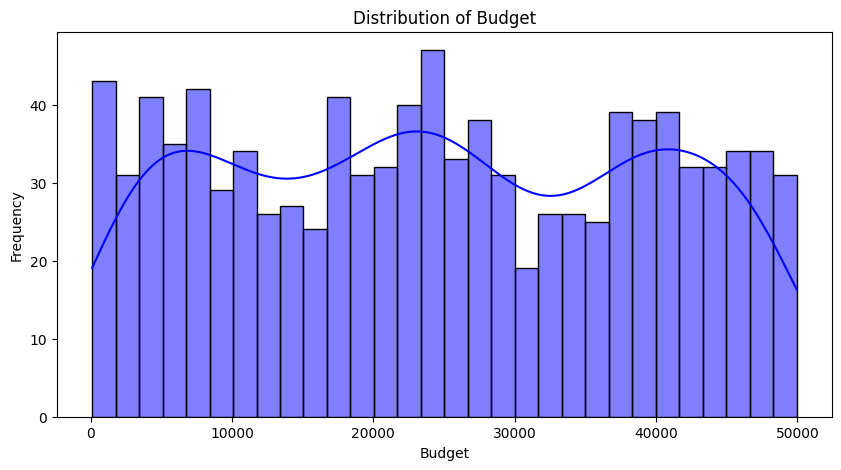

In [14]:
# Data Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['Budget'], bins=30, kde=True, color='blue')
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()


<ipython-input-15-f67bd1a657fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Success', y='Clicks', data=df, palette='coolwarm')


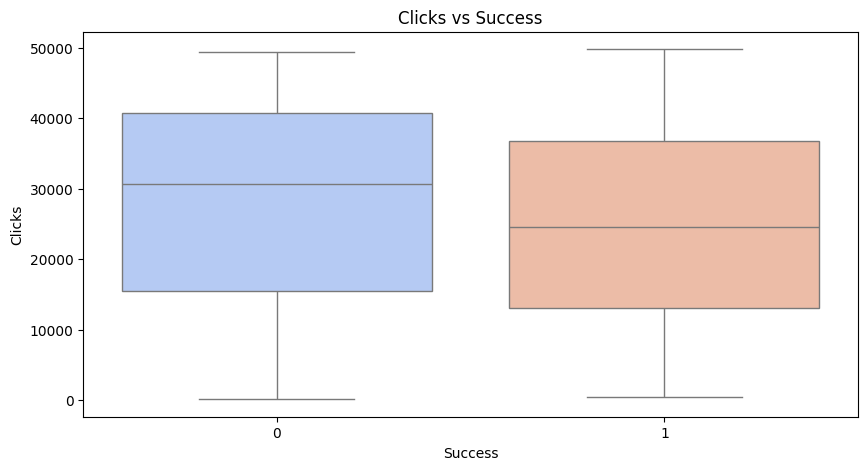

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Success', y='Clicks', data=df, palette='coolwarm')
plt.title('Clicks vs Success')
plt.show()

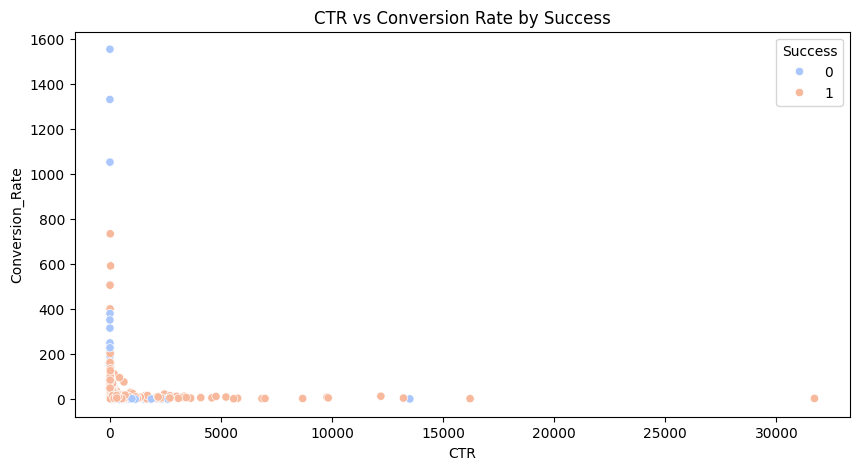

In [16]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['CTR'], y=df['Conversion_Rate'], hue=df['Success'], palette='coolwarm')
plt.title('CTR vs Conversion Rate by Success')
plt.show()

In [17]:
# Selecting Features and Target
features = ['Budget', 'Duration', 'Clicks', 'Conversions', 'CTR', 'CPC', 'Conversion_Rate']
target = 'Success'

In [18]:
X = df[features]
y = df[target]

In [19]:
# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [20]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [21]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [22]:
best_model = None
best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name


Logistic Regression Accuracy: 0.9916434540389972

Random Forest Accuracy: 0.9972144846796658

Gradient Boosting Accuracy: 0.9972144846796658

XGBoost Accuracy: 0.9972144846796658


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:32:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [23]:
print(f"\n✅ Best Model: {best_model_name} with Accuracy: {best_accuracy}")


✅ Best Model: Random Forest with Accuracy: 0.9972144846796658


In [24]:
# Model Evaluation
y_pred_best = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       187
           1       0.99      1.00      1.00       172

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



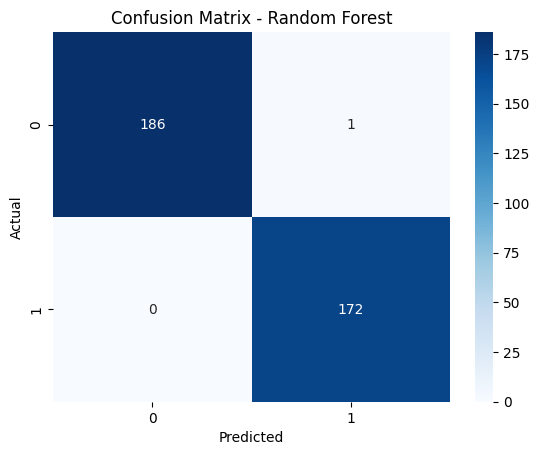

In [25]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [26]:
# Final Prediction Verdict
campaign_success_prediction = best_model.predict(X)
df["Predicted_Success"] = campaign_success_prediction
success_rate = df["Predicted_Success"].mean() * 100
print(f"\n📢 Final Verdict: Based on the best model ({best_model_name}), the predicted success rate of the campaigns is {success_rate:.2f}%.")


📢 Final Verdict: Based on the best model (Random Forest), the predicted success rate of the campaigns is 89.70%.
